# <center> Project Results</center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import *
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results_cla_acc = pd.read_pickle("results.pkl")
results_cla_auc= pd.read_pickle("results_auc.pkl")
results_reg= pd.read_pickle("results_reg.pkl")
y_hat = np.load('y_pred_nn.npy')
y_test_cla = np.load('y_test_cla.npy')

### 1. Best results

#### for classification

In [3]:
results_cla_acc

,model,best_train_score,best_test_score
0,nn_dl1,0.702023,0.482566
2,nn_dl2,0.811317,0.478595
1,LogisticRegression,0.543712,0.461348
3,SVC_linear,0.551762,0.460231
2,RandomForestClassifier,0.999984,0.447326
4,SVC_rbf,0.467302,0.431567
0,xgb,0.591797,0.414443
0,baseline,0.257678,0.256359


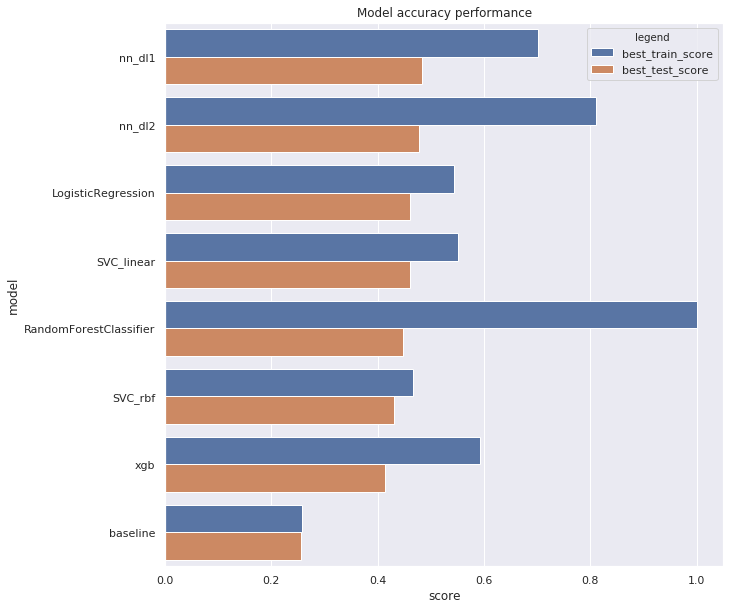

In [4]:
plt.figure(figsize=(10,10))
sns.barplot(data=pd.melt(results_cla_acc,var_name='legend', value_name='score', id_vars=['model'], value_vars=['best_train_score','best_test_score']),x='score',y='model',hue='legend',orient='h').set_title('Model accuracy performance');

In [5]:
results_cla_auc

,model,best_test_auc_score
0,nn_dl1,0.749162
2,nn_dl2,0.745792
0,xgb,0.686658
1,LogisticRegression,0.642378
3,SVC_linear,0.642130
2,RandomForestClassifier,0.632650
4,SVC_rbf,0.623144
0,baseline,0.500000


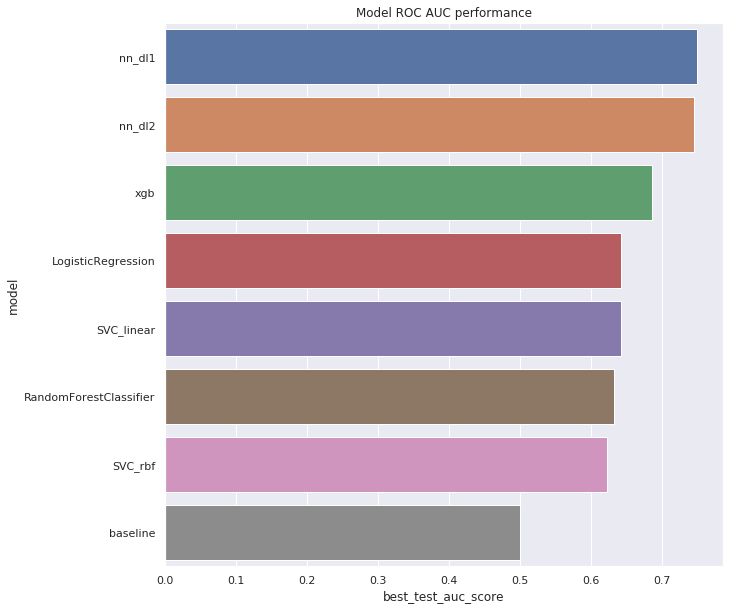

In [6]:
plt.figure(figsize=(10,10))
sns.barplot(data=results_cla_auc,x='best_test_auc_score',y='model', orient='h').set_title('Model ROC AUC performance');

#### For regression 

In [7]:
results_reg

,model,best_train_score,best_test_score
0,baseline,2.337071,2.288065
1,Lasso,1.664462,1.686022
4,SVR_rbf,1.620217,1.631165
1,xgb_reg,1.720762,1.628940
3,SVR_linear,1.510016,1.579635
2,Ridge,1.471164,1.564269
1,nn_dl1_reg,1.441225,1.541701
3,nn_dl2_reg,0.893092,1.429074


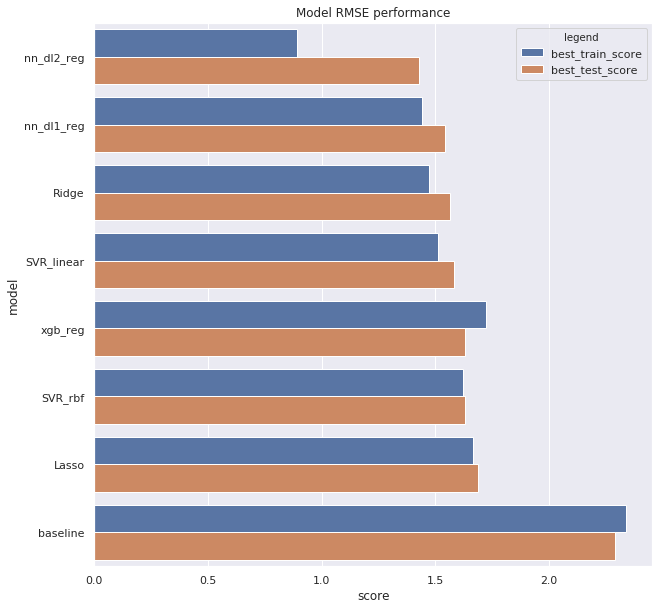

In [8]:
plt.figure(figsize=(10,10))
sns.barplot(data=pd.melt(results_reg.sort_values('best_test_score'),var_name='legend', value_name='score', id_vars=['model'], value_vars=['best_train_score','best_test_score']),x='score',y='model',hue='legend',orient='h').set_title('Model RMSE performance');

#### Conclusions :
- The best Model for classification is neural network with one hidden layer
- The best model for classification has an accuracy of 48% (baseline 25%) and a ROC AUC of 75% (baseline 50%).
- The best model for classification is far best than baseline (about twice best than baseline)



- The best Model for regression is neural network with one hidden layer
- The best model for regression has an RMSE of 1.42 (baseline 2.28) in the log scale.
- The best model for regression is far best than baseline (about twice best than baseline)

### 2. Classification report, confusion matrix (as percentage), ROC curve and precision-recall curve for the best model

In [9]:
def plot_multiclass_roc(y_test, y_score, n_classes, figsize=(16, 10)):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
    
def plot_precision_recall(y_test, y_score, n_classes, figsize=(16, 10)):
    precision = dict()
    recall = dict()
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    fig, ax = plt.subplots(figsize=figsize)
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
        ax.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()
cm = confusion_matrix(y_test_cla, np.argmax(y_hat,axis=1))   
classes = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test_cla, np.argmax(y_hat,axis=1), target_names=classes))

              precision    recall  f1-score   support

     class 0       0.48      0.60      0.53      1975
     class 1       0.40      0.30      0.35      2054
     class 2       0.43      0.41      0.42      2066
     class 3       0.61      0.63      0.62      1964

   micro avg       0.48      0.48      0.48      8059
   macro avg       0.48      0.49      0.48      8059
weighted avg       0.48      0.48      0.48      8059



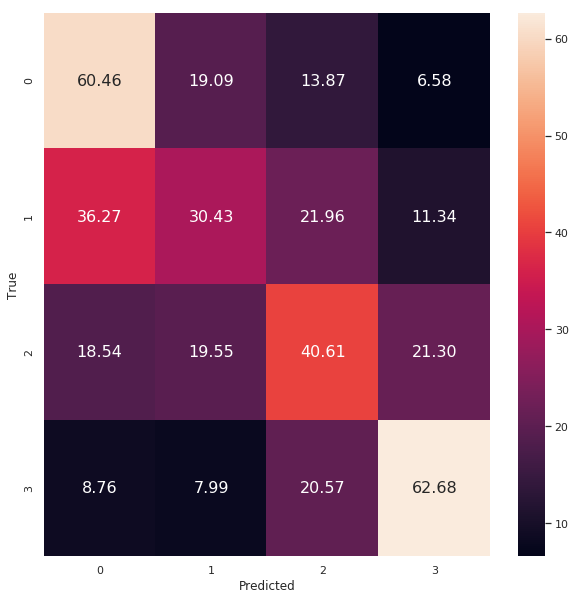

In [10]:
plt.figure(figsize=(10,10))
df_cm = pd.DataFrame(100*cm/cm.sum(axis=1).reshape(4,1), np.arange(4), np.arange(4))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('True');

Best accuracy (>60%) is for class 3 (Very high) than class 0 (Low).

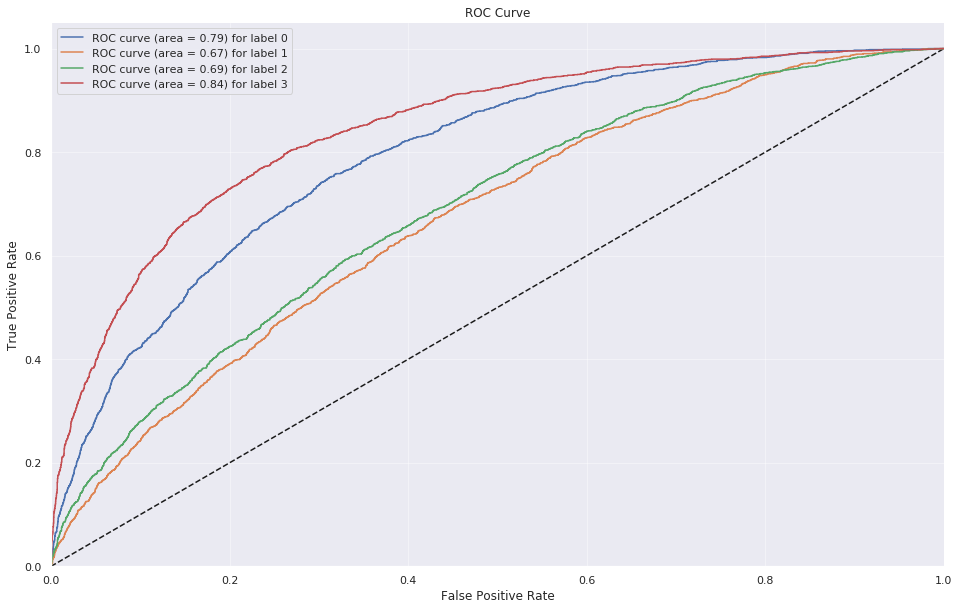

In [11]:
plot_multiclass_roc(y_test_cla,y_hat, n_classes=4)

Best ROC AUC is for class 3 (84%) than class 0 (79%).

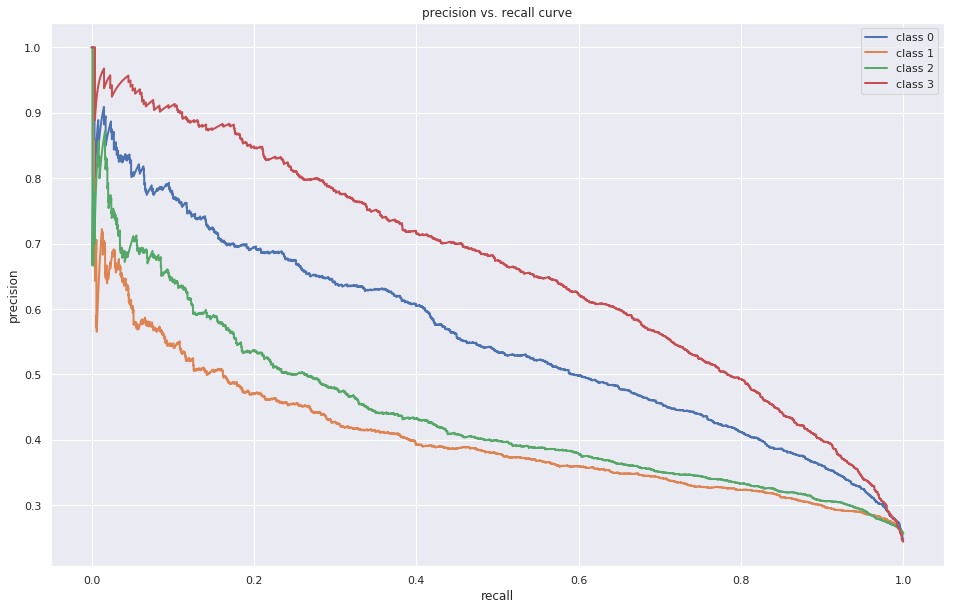

In [12]:
plot_precision_recall(y_test_cla,y_hat, n_classes=4)

#### Conclusion :
- Best accuracy (>60%) is for class 3 (Very high) than class 0 (Low).
- Class 3 and class 0 are best predicted by the model than Classes 1 and 2.
- It's more difficult for our classifiers to separate between adjacent classes. 
- Nevertheless, there is also misclassification for classes that are not adjacent (for example, 0 and 3). 

### 3. Answer to project questions

##### - What are the books properties that most influence the target value?
The most important features are book pages and categorical features : author, genre and format.

Title and description improves slightly the performance of the models.

Image features, calculated from inception_v3, are useless in our case.
##### - Does the description of the book affect the  target value?
Yes, it improves slightly the performance of the model.
##### - Does the cover image of the book affect the  target value?
No. high level image features calculated from inception_v3 are useless.
Neverthless, we have'nt tested other image features like colour histograms for example.


### 4. Project results discussion and potential improvements.

### - Execution time
The size of the dataset is big. In order to run the project notebooks, it takes a lot of time (more than 12 hours). So, it was difficult to test all the options.<br>
One of the improvements that we can do is to use GPU instead of CPU and run notebooks in a GPU environement like google colab.<br>
However, scikit learn library does not support GPU.<br>
To solve this issue, we can use other libraries like **h2o4gpu** (https://github.com/h2oai/h2o4gpu), or **cuml** (https://github.com/rapidsai/cuml).</br>
It seems that it's more easy to migrate from sickit learn to h2o4gpu because , as stated by project documentation, h2o4gpu can be used as a drop-in replacement for scikit-learn (i.e. import h2o4gpu as sklearn).<br>
We haven't tested this option, so, we are not sure that it will be the case for our project.<br>
Inception_v3, neural networks and xgboost suuport GPU natively.<br>

After migration to GPU, execution time of our notebooks will be very fast. So, testing other options will be possible.

### - Project results discution

The current dataset features (title, description, author, genre, format and book pages) are not sufficient enough to predict classes and number of raters with a high precision. They are not sufficent to explain all the variance<br>
Other infomations like publisher, publication date,book price, writing style, book adverdising, novelty factor, book critics, book reviews, ... have also an impact on rating of a book.<br>
Neverthless, using only these features, we can fit models that performs much better than the baseline.<br>

For the impact of the cover page on prediction, using only the high level features of inception_v3 does not improve the predictability of our models.

### - Potential improvements

We will propose here some improvements that can be done to enhance performance of our models.

#### a) Categorical encoding

In our project, we have used MultiLabelBinarizer to encode categorical features<br> This encoding technique generates a lot of dummy variables (>1000 for all categories in our dataset).<br>
There is other advanced category encoding techniques that can be tested like : Target encoding, LeaveOneOut, CatBoost ...<br>
Some of these techniques are implemented in a specialized library called **category_encoders** in scikit learn contrib (https://github.com/scikit-learn-contrib/category_encoders).<br>

For example, target encoding replaces a given categorical value by target mean for this value. Details of this approach is explained in the original research paper (Micci-Barreca, Daniele. (2001). A Preprocessing Scheme for High-Cardinality Categorical Attributes in Classification and Prediction Problems.. SIGKDD Explorations. 3. 27–32. 10.1145/507533.507538).<br> Targte encoding does not increase the number of features like MultiLabelBinarizer.

#### b) Text encoding

We have tested only Google Universal Sentence Encoder. Other techniques can be also tested like : tf-idf, Elmo, Bert, ...

#### c) image encoding

We have tested only inception_v3 which transforms images to high level features vector. Other techniques can be also tested like imagenet.<br>
We can also extract other features like color histograms to check if colors has an impact on prediction or not.<br> We can also test other feature vectors like HOG (Histogram of Oriented Gradients) and SIFT (Scale Invariant Feature Transform).<br>

#### d) AutoML

Using an AutoML library can help in finding a better model (or ensemble of models) which performs better than our manually tuned models.

Some well known AutoML libraries are TPOT, Auto-SKlearn, MLBOX, H2O AutoML, Auto-Keras, ...<br>
For libraries that does not support GPU, we can use a subset (10% for example) of the data as a training set to speedup finding the best model.

#### e) Error analysis

The idea is to analyze cases when classification fails and check existence of any systematic trend in these cases.

#### e) Ensemble learning

The idea is to combine multiple individual models using voting classifier (regressor) or  stacking classifier (regressor), and check if it improve performance.